![Elevvo Pathways](https://elevvo.tech/assets/nav_logo-5vkEKoZL.svg)
<h1>Data Cleaning and Insight Generation from Survey Data</h1>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset.csv', encoding='utf-8', errors='replace')
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_4440\854447061.py:1: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [87]:
list(df.columns)

['Year',
 'Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'For how many years have you been writing code and/or programming?',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
 

In [66]:
checkbox_cols = [col for col in df.columns if '(Select all that apply)' in col]

In [67]:
df = df[1::]
df.drop_duplicates(inplace=True)
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='all', axis=1, inplace=True)

In [69]:
gender_map = {
    'Man': 'Male',
    'Male': 'Male',
    'Woman': 'Female',
    'Female': 'Female',
    'Nonbinary': 'Non-binary',
    'Non-binary, genderqueer, or gender non-conforming': 'Non-binary',
    'A different identity': 'Other',
    'Prefer to self-describe': 'Other',
    'Prefer not to say': 'Prefer not to say'
}

df['What is your gender? - Selected Choice'] = df['What is your gender? - Selected Choice'].map(lambda x: gender_map.get(x, 'Other'))
df['What is your gender? - Selected Choice'].unique()

array(['Male', 'Female', 'Non-binary', 'Prefer not to say', 'Other'],
      dtype=object)

In [80]:
df.dropna(how='any', subset=list(df.columns)[0:8], inplace=True)

In [81]:
checkbox_cols = [col for col in df.columns if '(Select all that apply)' in col]
df[checkbox_cols] = df[checkbox_cols].notna().astype(int)

In [ ]:
language_cols = list(df.columns)[8:20]

df_melted = df.melt(id_vars='Year', 
                    value_vars=language_cols, 
                    var_name='Language', 
                    value_name='Used')

df_melted = df_melted[df_melted['Used'] == 1]
lang_counts = df_melted.groupby(['Year', 'Language']).size().reset_index(name='Count')
lang_counts['Language'] = lang_counts['Language'].str.replace('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - ', '')

,Year,Language,Count
0,2018,Bash,2681
1,2018,Java,3919
2,2018,Javascript,3195
3,2018,Julia,229
4,2018,MATLAB,2601
5,2018,Other,620
6,2018,Python,15483
7,2018,R,6587
8,2018,SQL,8154
9,2019,Bash,2037


In [109]:
top_langs = lang_counts.sort_values(['Year', 'Count'], ascending=[True, False]).groupby('Year').first().reset_index()


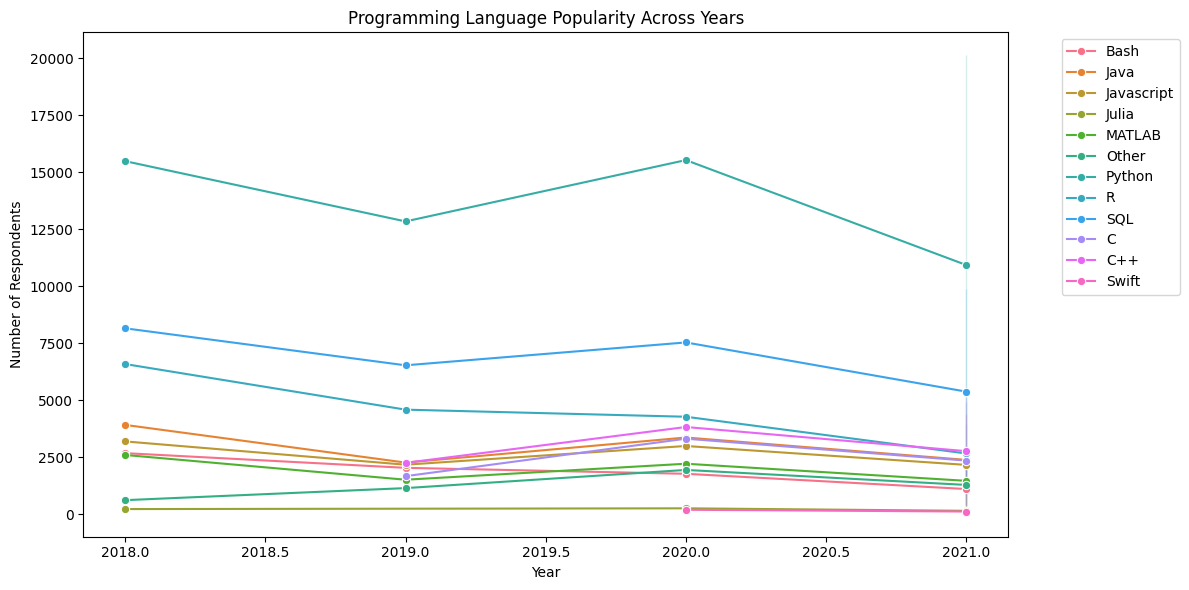

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=lang_counts, x='Year', y='Count', hue='Language', marker='o')
plt.title('Programming Language Popularity Across Years')
plt.ylabel('Number of Respondents')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
